In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
df = pd.read_csv('data/merged_flight_weather_Jan2023.csv')
df.head()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),...,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT06,WT08
0,DL,308.0,N507DZ,SEA,07:00,07:09,9.0,0.0,0.0,0.0,...,300.0,330.0,18.1,23.0,1.0,1.0,NaN,NaN,NaN,NaN
1,DL,311.0,N908DN,LAS,17:35,17:32,-3.0,0.0,0.0,0.0,...,300.0,330.0,18.1,23.0,1.0,1.0,NaN,NaN,NaN,NaN
2,DL,312.0,N176DN,HNL,09:00,09:49,49.0,0.0,0.0,0.0,...,300.0,330.0,18.1,23.0,1.0,1.0,NaN,NaN,NaN,NaN
3,DL,315.0,N811DZ,SLC,18:20,18:18,-2.0,0.0,0.0,19.0,...,300.0,330.0,18.1,23.0,1.0,1.0,NaN,NaN,NaN,NaN
4,DL,325.0,N704X,SFO,10:05,10:08,3.0,0.0,0.0,0.0,...,300.0,330.0,18.1,23.0,1.0,1.0,NaN,NaN,NaN,NaN


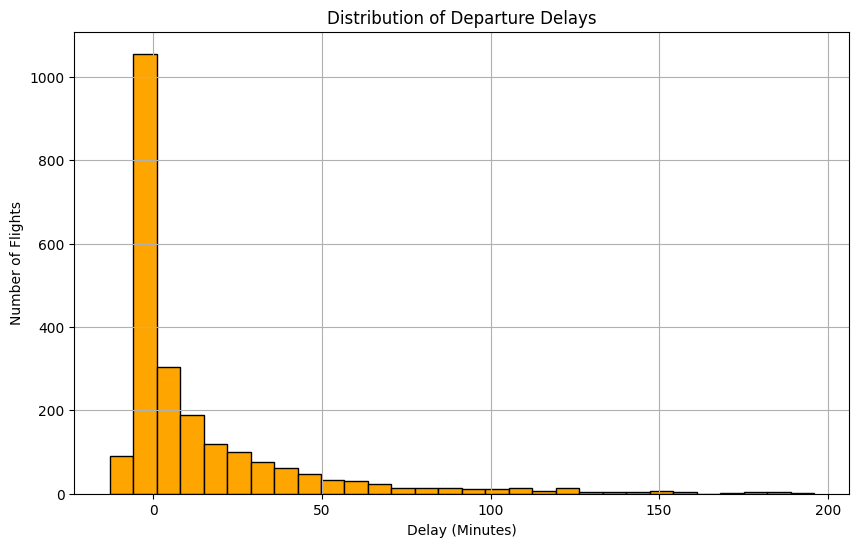

In [25]:
#📊 Distribution of Departure Delays
# Filter delays for better visualization
df_filtered = df[df['Departure delay (Minutes)'].between(-20, 200)]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df_filtered['Departure delay (Minutes)'], bins=30, edgecolor='black', color='orange')
plt.title('Distribution of Departure Delays')
plt.xlabel('Delay (Minutes)')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.show()

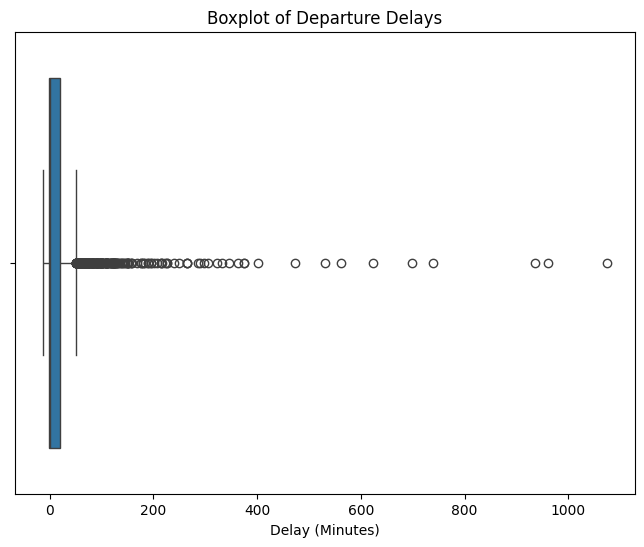

In [26]:
#📊 Boxplot of Departure Delays
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Departure delay (Minutes)'])
plt.title('Boxplot of Departure Delays')
plt.xlabel('Delay (Minutes)')
plt.show()

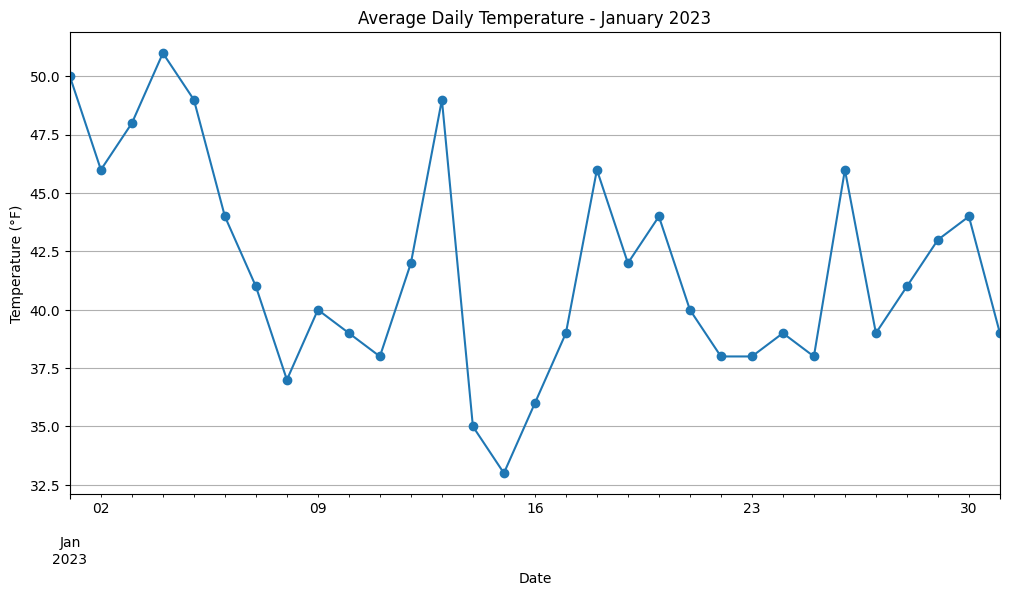

In [27]:
#🌡️ Average Daily Temperature
df['DATE'] = pd.to_datetime(df['Date'])
daily_temp = df.groupby('DATE')['TAVG'].mean()

plt.figure(figsize=(12,6))
daily_temp.plot(marker='o')
plt.title('Average Daily Temperature - January 2023')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.show()

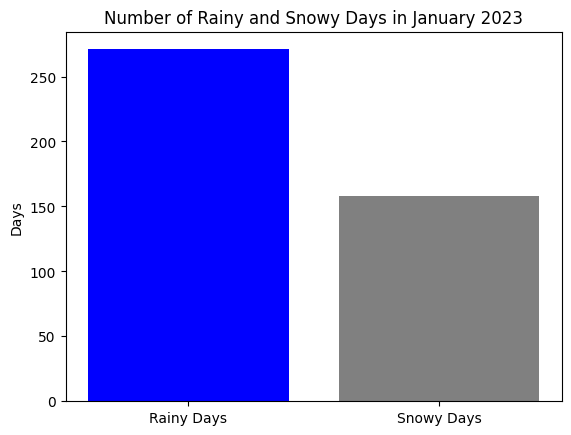

In [28]:
#🌧️ Rainy and Snowy Days Count
rainy_days = df['WT02'].sum()
snowy_days = df['WT03'].sum()

plt.bar(['Rainy Days', 'Snowy Days'], [rainy_days, snowy_days], color=['blue', 'gray'])
plt.title('Number of Rainy and Snowy Days in January 2023')
plt.ylabel('Days')
plt.show()

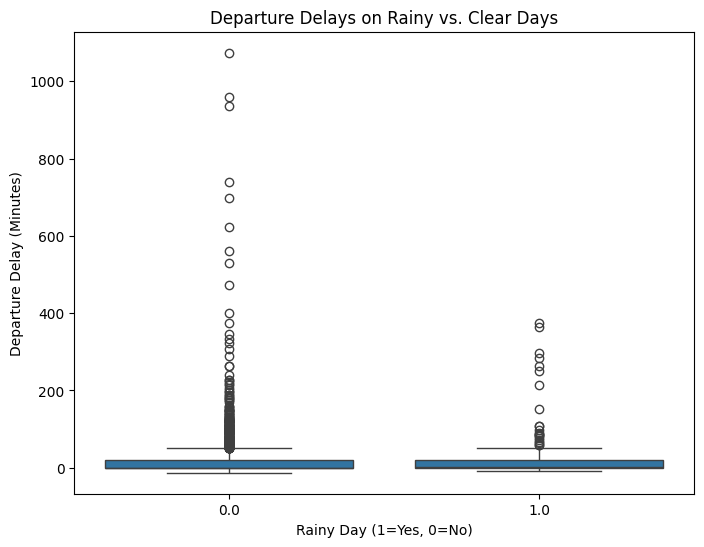

In [29]:
#🌧️ Rainy and Snowy Days Count
df['Rain'] = df['WT02'].fillna(0)
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Rain'], y=df['Departure delay (Minutes)'])
plt.title('Departure Delays on Rainy vs. Clear Days')
plt.xlabel('Rainy Day (1=Yes, 0=No)')
plt.ylabel('Departure Delay (Minutes)')
plt.show()

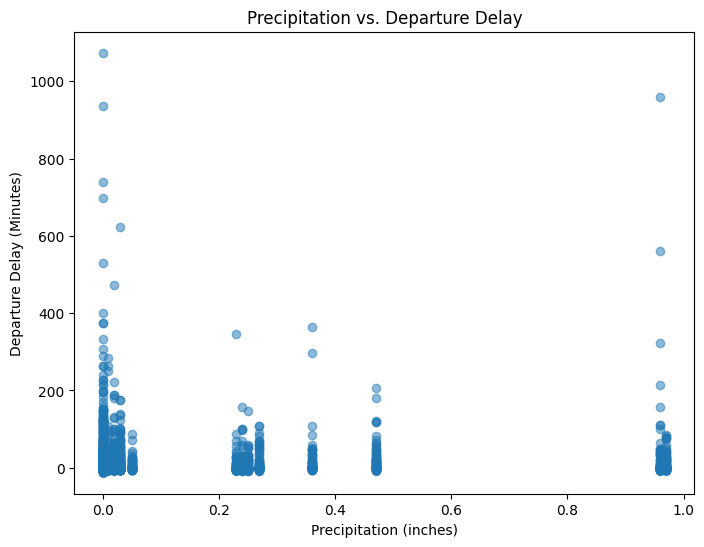

In [31]:
#🌧️ Precipitation vs. Departure Delay
plt.figure(figsize=(8,6))
plt.scatter(df['PRCP'], df['Departure delay (Minutes)'], alpha=0.5)
plt.title('Precipitation vs. Departure Delay')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Departure Delay (Minutes)')
plt.show()


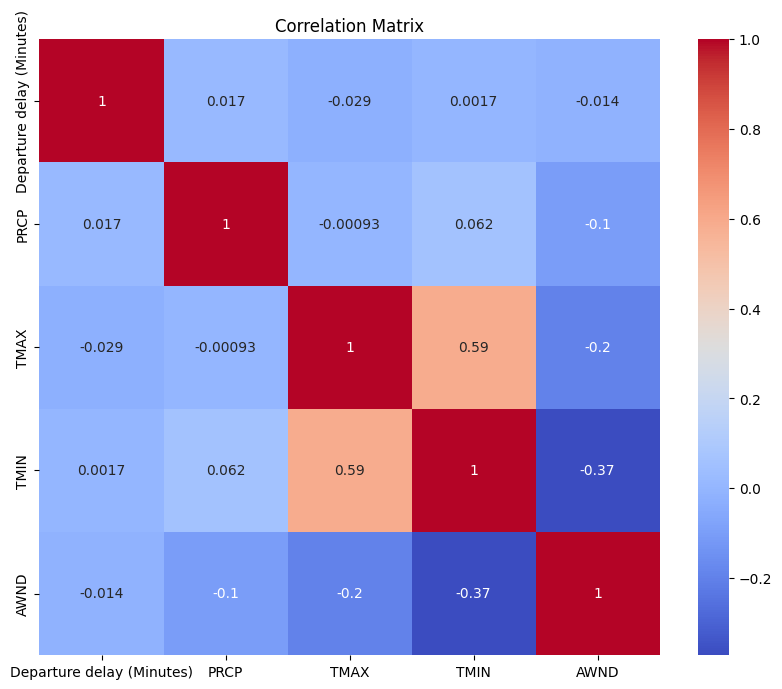

In [32]:
#🔥 Correlation Matrix
plt.figure(figsize=(10,8))
corr = df[['Departure delay (Minutes)', 'PRCP', 'TMAX', 'TMIN', 'AWND']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
